In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

KeVPerBin=0.541

def readSpe(path):
    f=open(path,"r")
    data=f.readlines()
    values=data[12:2060]
    values=[int(row) for row in values]
    duration=int(data[9].split(" ")[0])
    print(duration)
    df=pd.DataFrame({"bin":np.arange(0,len(values),1),
        "counts":values,
        "countsPerMin":np.array(values)/duration*60,
        "energy":np.arange(0,len(values),1)*KeVPerBin
        })
    
    return df


background=readSpe("thinTarget/background.spe")
Cs137=readSpe("thinTarget/caesium137.Spe")
Co60=readSpe("thinTarget/cobalt60.Spe")

run350=readSpe("thinTarget/350.Spe")
runs=["350","375","400","425","450","475","490","500","515","540"]

thinData={}
for run in runs:
    thinData[int(run)]=readSpe(f"thinTarget/{run}.Spe")



    

1242
101
202
346
346
339
337
461
498
465
547
207
406
282


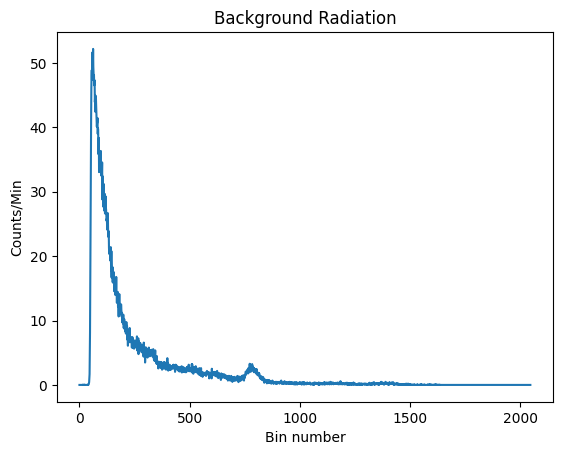

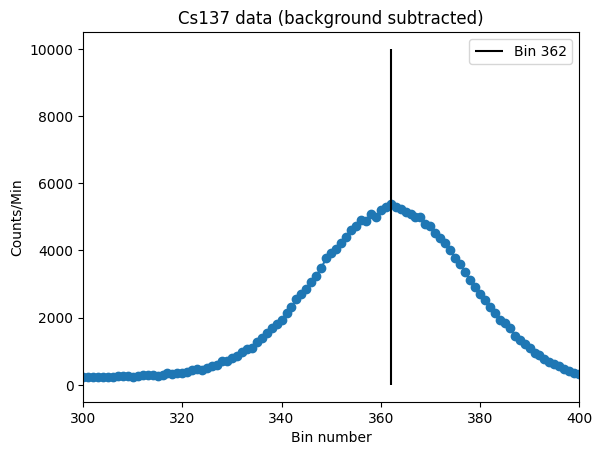

In [78]:
plt.plot(background["countsPerMin"])
plt.xlabel("Bin number")
plt.ylabel("Counts/Min")
plt.title("Background Radiation")
plt.show()

plt.plot(Cs137["countsPerMin"]-background["countsPerMin"],"o-")
plt.title("Cs137 data (background subtracted)")
plt.vlines(362,0,10000,color="k",label="Bin 362")
plt.xlim(300,400)
plt.xlabel("Bin number")
plt.ylabel("Counts/Min")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[127 633 715]


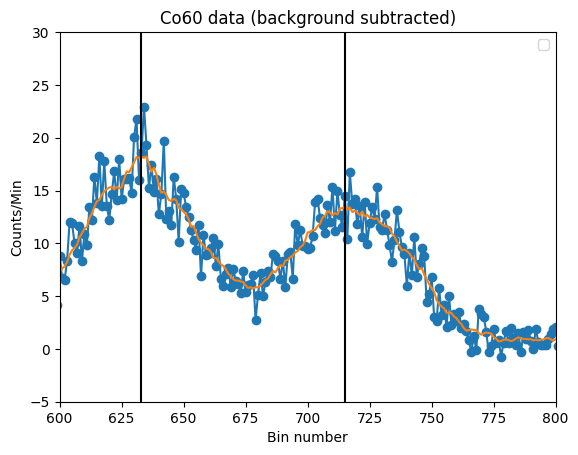

In [79]:
plt.plot(Co60["countsPerMin"]-background["countsPerMin"],"o-")

rollingAvg=np.convolve(Co60["countsPerMin"]-background["countsPerMin"],np.ones(10),"same")/10
plt.plot(rollingAvg)
peaks,_=scipy.signal.find_peaks(rollingAvg,prominence=5)
print(peaks)
plt.vlines(peaks,-5,30,color="k")

plt.title("Co60 data (background subtracted)")
#plt.vlines(362,0,10000,color="k",label="Bin 362")
plt.xlim(600,800)
plt.ylim(-5,30)
plt.xlabel("Bin number")
plt.ylabel("Counts/Min")
plt.legend()

In [80]:
peaks=np.array([362,633,715])
actual=np.array([661.66,1173.24,1332.50])
factors=peaks/actual
factor=np.mean(factors)
np.std(factors)

0.004432667620166168

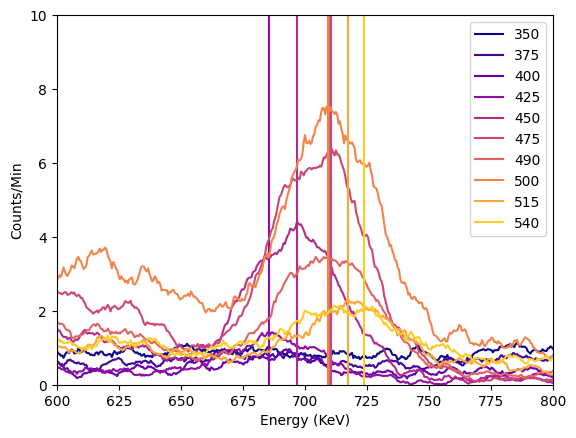

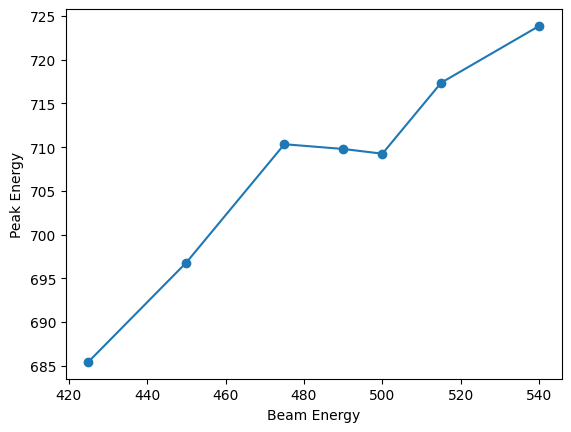

In [81]:

plt.xlim(600,800)
plt.ylim(0,10)

peaks=[]
peaksEnergies=[]
for i,key in enumerate(thinData.keys()):
    data=thinData[key]["countsPerMin"].to_numpy()
    rollingData=np.convolve(data-background["countsPerMin"],np.ones(15)/15,'same')

    color=plt.cm.plasma(i/len(thinData))


    
    plt.plot(background["energy"],rollingData,label=key,color=color)
    #plt.plot(background["energy"],background["countsPerMin"])
    plt.xlabel("Energy (KeV)")
    plt.ylabel("Counts/Min")

    peaksI,_=scipy.signal.find_peaks(rollingData,prominence=1)
    peaksI = [peak for peak in peaksI if background["energy"][peak]>650 and background["energy"][peak]<750]

    plt.vlines(background["energy"][peaksI],0,10,color=color)
    if len(peaksI)>0:
        peaks.append(background["energy"][peaksI[0]])
        peaksEnergies.append(key)


    
plt.legend()
plt.show()

plt.xlabel("Beam Energy")
plt.ylabel("Peak Energy")
plt.plot(peaksEnergies,peaks,"-o")


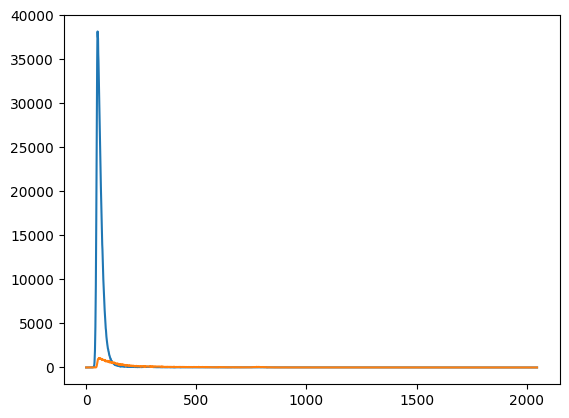

In [82]:
plt.plot(thinData[350]["counts"])
plt.plot(background["counts"])